In [1]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Carregar os dados do MNIST (imagens de dígitos de 0 a 9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

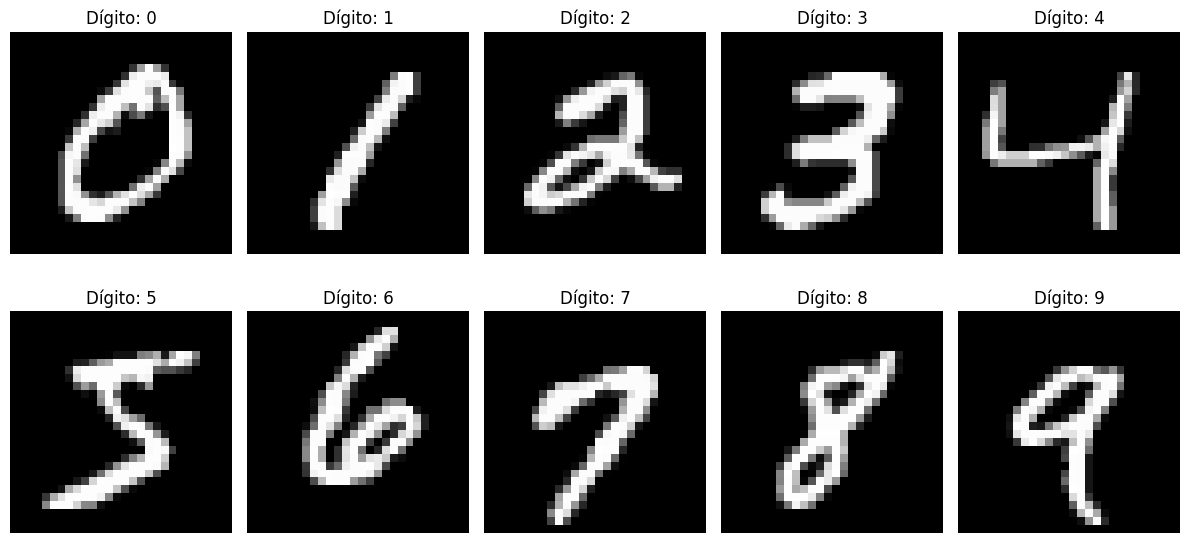

In [3]:
# Lista para armazenar os índices das primeiras ocorrências de cada dígito
indices = []

# Encontrar os índices das primeiras ocorrências dos dígitos de 0 a 9
for digit in range(10):
    idx = np.where(y_train == digit)[0][0]  # Obter o primeiro índice do dígito
    indices.append(idx)

# Exibir as 10 imagens correspondentes aos índices encontrados
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Layout 2x5 para 10 imagens
    plt.imshow(x_train[idx], cmap="gray")  # Exibir a imagem do dígito
    plt.title(f"Dígito: {y_train[idx]}")  # Corrigir o título para o rótulo correto
    plt.axis("off")  # Remover os eixos

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

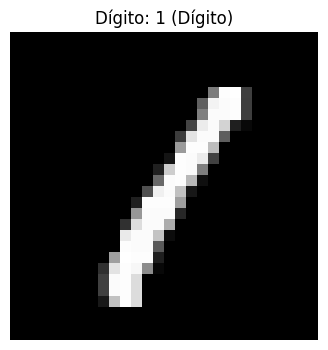

Valores dos pixels do dígito (28x28):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [4]:
idx_digit = indices[1]
digit_image = x_train[idx_digit]

# Exibir a imagem do dígito
plt.figure(figsize=(4, 4))
plt.imshow(digit_image, cmap="gray")
plt.title(f"Dígito: {y_train[idx_digit]} (Dígito)")
plt.axis("off")  # Remover os eixos
plt.show()

# Imprimir os valores numéricos dos pixels
print("Valores dos pixels do dígito (28x28):")
print(digit_image)

In [5]:
# Dividir os dados de treino em treino e validação
X_train = x_train[0:50000] / 255.0  # Normalizar os dados para o intervalo [0, 1]
Y_train = to_categorical(y_train[0:50000], 10)  # One-hot encoding para os rótulos

X_val = x_train[50000:60000] / 255.0  # Dados de validação
Y_val = to_categorical(y_train[50000:60000], 10)

X_test = x_test / 255.0  # Normalizar os dados de teste
Y_test = to_categorical(y_test, 10)

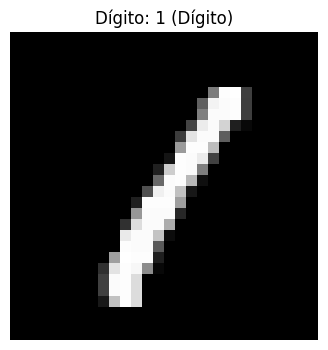

Valores dos pixels do dígito (28x28):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.    

In [6]:
idx_digit = indices[1]
digit_image = X_train[idx_digit]

# Exibir a imagem do dígito
plt.figure(figsize=(4, 4))
plt.imshow(digit_image, cmap="gray")
plt.title(f"Dígito: {y_train[idx_digit]} (Dígito)")
plt.axis("off")  # Remover os eixos
plt.show()

# Imprimir os valores numéricos dos pixels
print("Valores dos pixels do dígito (28x28):")
print(digit_image)

In [7]:
# Ajustar os dados para o formato esperado pelos modelos CNN (matrizes 4D)
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_val = np.reshape(X_val, (X_val.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
# Função para embaralhar os pixels da imagem
def shuffel_pixels(idx, data):
    data_new = np.zeros(data.shape)
    for i, img in enumerate(data):
        data_new[i] = img.flatten()[idx].reshape((28, 28, 1))
    return data_new

In [9]:
# Função para plotar gráficos de acurácia e loss
def plot_metrics(history, title_suffix=""):
    plt.figure(figsize=(12, 5))
    
    # Plotar acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treinamento')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title(f"Acurácia x Épocas {title_suffix}")
    plt.xlabel("Épocas")
    plt.ylabel("Acurácia")
    plt.legend()
    
    # Plotar perda (loss)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title(f"Loss x Épocas {title_suffix}")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [10]:
# Função para imprimir a matriz de confusão
def print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(title)
    print(conf_matrix)

In [11]:
# Gerar índices embaralhados para embaralhar os pixels
np.random.seed(42)
shuffel_idx = np.random.permutation(np.arange(28 * 28))

In [12]:
# Embaralhar os dados de treino, validação e teste
X_train_shuffle = shuffel_pixels(shuffel_idx, X_train)
X_val_shuffle = shuffel_pixels(shuffel_idx, X_val)
X_test_shuffle = shuffel_pixels(shuffel_idx, X_test)

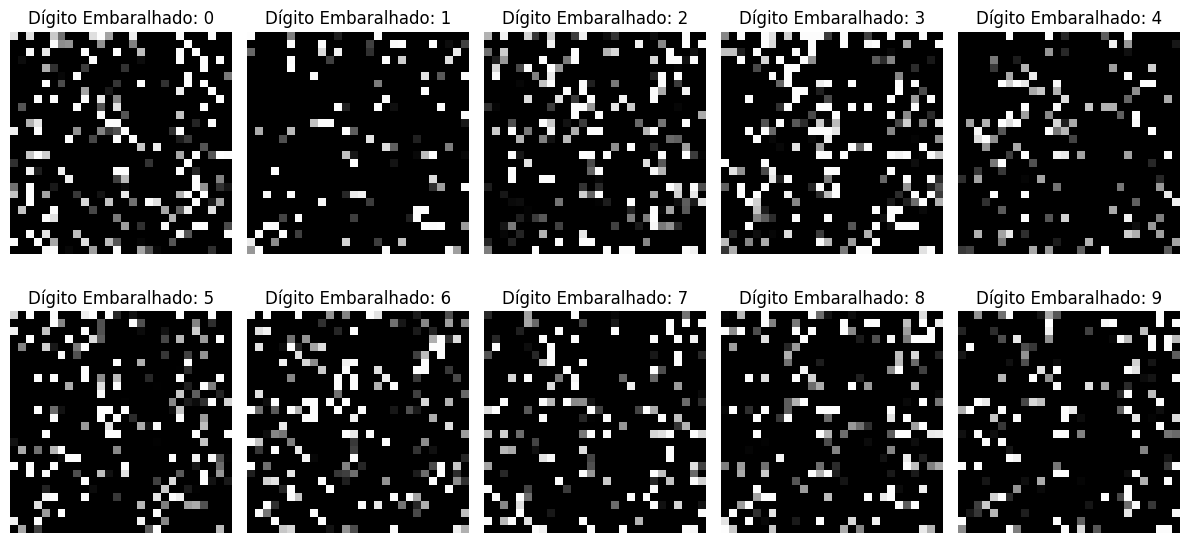

In [13]:
# Lista para armazenar os índices das primeiras ocorrências de cada dígito
indices = []

# Encontrar os índices das primeiras ocorrências dos dígitos de 0 a 9
for digit in range(10):
    idx = np.where(y_train == digit)[0][0]  # Obter o primeiro índice do dígito
    indices.append(idx)

# Exibir as 10 imagens embaralhadas correspondentes aos índices encontrados
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Layout 2x5 para 10 imagens
    plt.imshow(X_train_shuffle[idx].reshape(28, 28), cmap="gray")  # Mostrar a imagem embaralhada
    plt.title(f"Dígito Embaralhado: {y_train[idx]}")  # Título com o rótulo original
    plt.axis("off")  # Remover os eixos

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

In [14]:
# Ajustar os dados para o formato vetorial necessário para as fcNNs (fully connected neural networks)
X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])

In [15]:
# Ajustar os dados embaralhados para o formato vetorial
X_train_shuffle_flat = X_train_shuffle.reshape([X_train_shuffle.shape[0], 784])
X_val_shuffle_flat = X_val_shuffle.reshape([X_val_shuffle.shape[0], 784])
X_test_shuffle_flat = X_test_shuffle.reshape([X_test_shuffle.shape[0], 784])

In [16]:
# Definir uma rede neural totalmente conectada (fcNN) com 2 camadas ocultas
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

d:\Monte Carlo Digital\Projeto MNIST\.env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# Treinar a fcNN nos dados originais
history = model.fit(X_train_flat, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_flat, Y_val))

Epoch 1/10
391/391 - 9s - 22ms/step - accuracy: 0.7694 - loss: 0.9891 - val_accuracy: 0.9065 - val_loss: 0.4027
Epoch 2/10
391/391 - 2s - 5ms/step - accuracy: 0.9115 - loss: 0.3379 - val_accuracy: 0.9304 - val_loss: 0.2568
Epoch 3/10
391/391 - 2s - 4ms/step - accuracy: 0.9314 - loss: 0.2461 - val_accuracy: 0.9439 - val_loss: 0.2033
Epoch 4/10
391/391 - 2s - 5ms/step - accuracy: 0.9428 - loss: 0.2001 - val_accuracy: 0.9527 - val_loss: 0.1739
Epoch 5/10
391/391 - 2s - 4ms/step - accuracy: 0.9520 - loss: 0.1670 - val_accuracy: 0.9570 - val_loss: 0.1518
Epoch 6/10
391/391 - 2s - 5ms/step - accuracy: 0.9593 - loss: 0.1428 - val_accuracy: 0.9619 - val_loss: 0.1375
Epoch 7/10
391/391 - 2s - 4ms/step - accuracy: 0.9652 - loss: 0.1229 - val_accuracy: 0.9643 - val_loss: 0.1244
Epoch 8/10
391/391 - 2s - 5ms/step - accuracy: 0.9699 - loss: 0.1068 - val_accuracy: 0.9652 - val_loss: 0.1164
Epoch 9/10
391/391 - 2s - 4ms/step - accuracy: 0.9736 - loss: 0.0942 - val_accuracy: 0.9692 - val_loss: 0.1071


Estrutura da Matriz de Confusão
Linhas: Representam as classes reais (rótulos verdadeiros) dos dígitos.
Colunas: Representam as classes preditas (saídas do modelo).

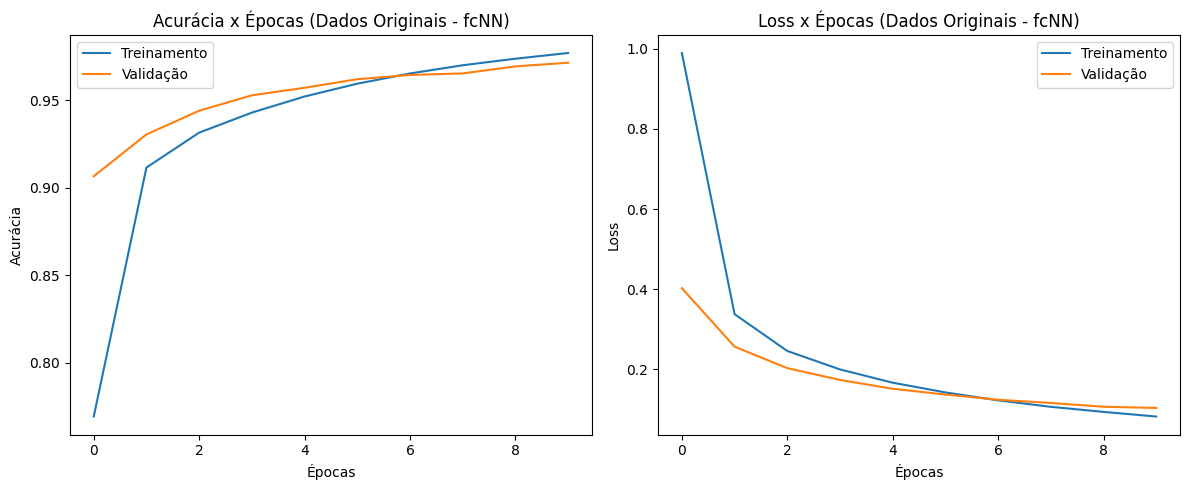

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Matriz de Confusão - fcNN (Dados Originais)
[[ 968    0    2    2    2    0    4    1    1    0]
 [   0 1126    3    0    0    1    2    0    3    0]
 [   5    1  999    6    3    0    4    7    6    1]
 [   1    0    7  986    0    1    0    8    5    2]
 [   2    0    5    1  948    0    3    3    2   18]
 [   5    1    0   22    3  834    9    2   10    6]
 [   8    3    1    1    2    4  934    0    5    0]
 [   1    3   14    8    0    1    0  986    0   15]
 [   5    2    4   11    5    3    2    4  936    2]
 [   4    6    0   15   14    2    0    6    1  961]]


In [19]:
# Plotar métricas e imprimir matriz de confusão (dados originais)
plot_metrics(history, title_suffix="(Dados Originais - fcNN)")
pred = model.predict(X_test_flat)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - fcNN (Dados Originais)")

In [20]:
# Avaliar o modelo nos dados de teste originais
pred = model.predict(X_test_flat)
acc_fc_orig = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com dados originais (fcNN):", acc_fc_orig)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia com dados originais (fcNN): 0.9678


In [21]:
# Definir uma rede neural totalmente conectada (fcNN) com 2 camadas ocultas
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

d:\Monte Carlo Digital\Projeto MNIST\.env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
history = model.fit(X_train_shuffle_flat, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_shuffle_flat, Y_val))

Epoch 1/10
391/391 - 4s - 11ms/step - accuracy: 0.7799 - loss: 0.9888 - val_accuracy: 0.9095 - val_loss: 0.3905
Epoch 2/10
391/391 - 1s - 4ms/step - accuracy: 0.9152 - loss: 0.3276 - val_accuracy: 0.9315 - val_loss: 0.2515
Epoch 3/10
391/391 - 2s - 4ms/step - accuracy: 0.9327 - loss: 0.2408 - val_accuracy: 0.9447 - val_loss: 0.2010
Epoch 4/10
391/391 - 2s - 6ms/step - accuracy: 0.9438 - loss: 0.1964 - val_accuracy: 0.9514 - val_loss: 0.1747
Epoch 5/10
391/391 - 2s - 5ms/step - accuracy: 0.9520 - loss: 0.1656 - val_accuracy: 0.9572 - val_loss: 0.1533
Epoch 6/10
391/391 - 2s - 5ms/step - accuracy: 0.9596 - loss: 0.1412 - val_accuracy: 0.9617 - val_loss: 0.1351
Epoch 7/10
391/391 - 2s - 4ms/step - accuracy: 0.9658 - loss: 0.1217 - val_accuracy: 0.9648 - val_loss: 0.1243
Epoch 8/10
391/391 - 2s - 5ms/step - accuracy: 0.9696 - loss: 0.1052 - val_accuracy: 0.9671 - val_loss: 0.1140
Epoch 9/10
391/391 - 2s - 5ms/step - accuracy: 0.9735 - loss: 0.0926 - val_accuracy: 0.9685 - val_loss: 0.1074


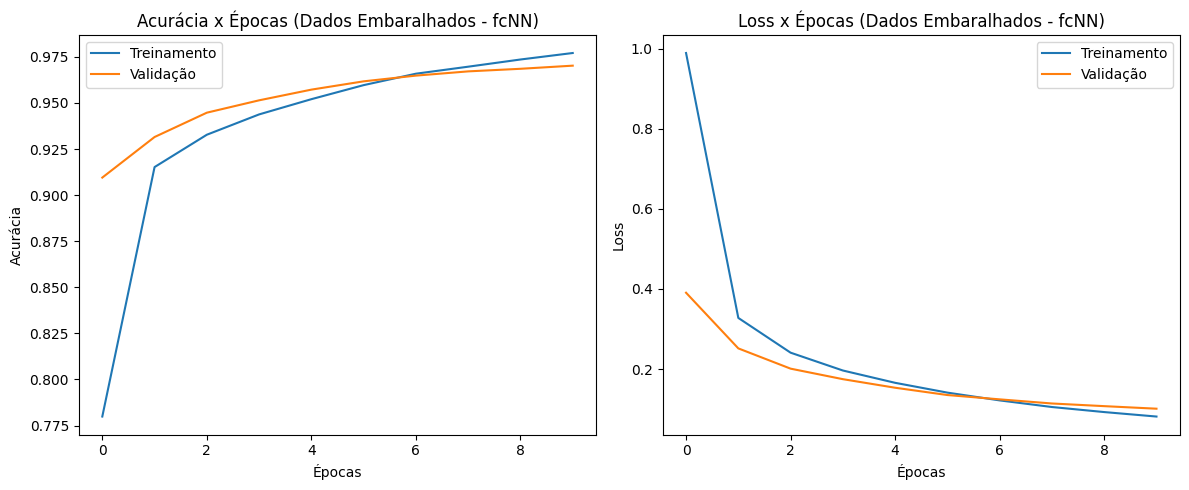

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Matriz de Confusão - fcNN (Dados Embaralhados)
[[ 961    0    2    1    0    5    9    1    1    0]
 [   0 1124    3    0    0    1    4    0    3    0]
 [   6    2  995    3    4    1    5    5   11    0]
 [   0    1    5  972    0   14    0    7   11    0]
 [   1    0    2    0  952    0    7    2    2   16]
 [   2    0    0    8    2  863    8    1    6    2]
 [   6    2    0    0    2    6  936    0    6    0]
 [   0   12   10    1    2    1    0  992    1    9]
 [   4    1    3    6    4   10    4    3  937    2]
 [   3    4    0    9   13    7    1    8    6  958]]


In [24]:
# Plotar métricas e imprimir matriz de confusão (dados embaralhados)
plot_metrics(history, title_suffix="(Dados Embaralhados - fcNN)")
pred = model.predict(X_test_shuffle_flat)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - fcNN (Dados Embaralhados)")

In [25]:
# Avaliar o modelo nos dados de teste embaralhados
pred = model.predict(X_test_shuffle_flat)
acc_fc_shuffle = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com dados embaralhados (fcNN):", acc_fc_shuffle)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia com dados embaralhados (fcNN): 0.969


In [ ]:
# Definir uma CNN para trabalhar com dados organizados espacialmente
model = Sequential()
model.add(Convolution2D(8, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Convolution2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Treinar a CNN nos dados originais
history = model.fit(X_train, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val, Y_val))

In [ ]:
# Plotar métricas e imprimir matriz de confusão (dados originais)
plot_metrics(history, title_suffix="(Dados Originais - CNN)")
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - CNN (Dados Originais)")

In [ ]:
# Avaliar a CNN nos dados originais
pred = model.predict(X_test)
acc_cnn = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com CNN (dados originais):", acc_cnn)

In [ ]:
# Treinar a CNN nos dados embaralhados
history = model.fit(X_train_shuffle, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_shuffle, Y_val))

In [ ]:
# Plotar métricas e imprimir matriz de confusão (dados embaralhados)
plot_metrics(history, title_suffix="(Dados Embaralhados - CNN)")
pred = model.predict(X_test_shuffle)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - CNN (Dados Embaralhados)")

In [ ]:
# Avaliar a CNN nos dados embaralhados
pred = model.predict(X_test_shuffle)
acc_cnn_shuffle = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com CNN (dados embaralhados):", acc_cnn_shuffle)